In [1]:
import numpy as np
import pandas as pd

from pydataset import data

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from wrangle import wrangle_telco
import split_scale as ss
import explore as ex
import evaluate as ev
import feature_engineering as fe

In [2]:
telco = wrangle_telco()

/Users/alechartman/codeup-data-science/ds-methodologies-exercises/regression/wrangle.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_charges"] = df.total_charges.astype("float")


In [3]:
telco

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75
...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.40
1691,9972-EWRJS,19.25,67,1372.90
1692,9975-GPKZU,19.75,46,856.50
1693,9993-LHIEB,67.85,67,4627.65


In [4]:
train, test = ss.split_my_data(telco)

In [5]:
train

,customer_id,monthly_charges,tenure,total_charges
893,5377-NDTOU,91.05,71,6293.75
324,2007-QVGAW,19.35,68,1292.65
1237,7337-CINUD,19.50,8,159.35
421,2533-QVMSK,94.10,61,5638.30
793,4878-BUNFV,20.70,42,828.85
...,...,...,...,...
1268,7560-QJAVJ,79.60,70,5589.45
1452,8577-QSOCG,20.20,38,746.05
1225,7268-WNTCP,20.45,62,1297.35
400,2400-XIWIO,90.10,71,6310.90


In [6]:
test

,customer_id,monthly_charges,tenure,total_charges
1663,9802-CAQUT,109.55,72,7887.25
1403,8232-UTFOZ,19.95,69,1399.35
778,4807-IZYOZ,20.65,51,1020.75
939,5702-KVQRD,82.55,71,5832.65
1150,6867-ACCZI,52.50,24,1208.15
...,...,...,...,...
365,2226-ICFDO,85.90,72,6110.75
1583,9365-CSLBQ,24.35,71,1654.60
623,3764-MNMOI,19.20,46,908.15
364,2225-ZRGSG,93.90,70,6579.05


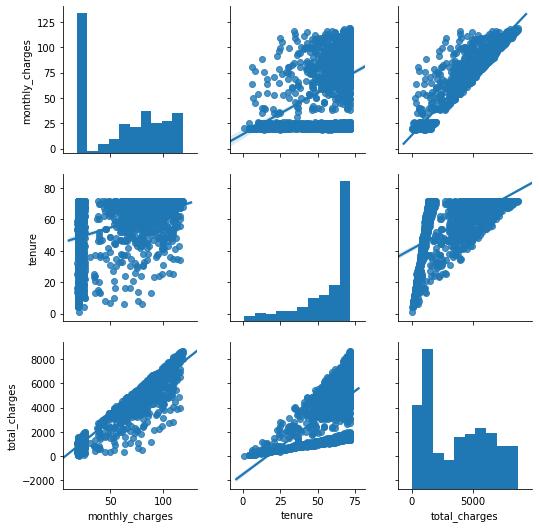

In [7]:
ex.plot_variable_pairs(train)

In [8]:
ex.months_to_years(telco.tenure, train)

/Users/alechartman/codeup-data-science/ds-methodologies-exercises/regression/explore.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tenure_years"] = np.round(tenure_months // 12)


,customer_id,monthly_charges,tenure,total_charges,tenure_years
893,5377-NDTOU,91.05,71,6293.75,5
324,2007-QVGAW,19.35,68,1292.65,5
1237,7337-CINUD,19.50,8,159.35,0
421,2533-QVMSK,94.10,61,5638.30,5
793,4878-BUNFV,20.70,42,828.85,3
...,...,...,...,...,...
1268,7560-QJAVJ,79.60,70,5589.45,5
1452,8577-QSOCG,20.20,38,746.05,3
1225,7268-WNTCP,20.45,62,1297.35,5
400,2400-XIWIO,90.10,71,6310.90,5


In [9]:
train["tenure_bins"] = pd.cut(train.tenure_years, bins=3, labels=["Two or Fewer", "Two to Four", "Four to Six"])
train


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_id,monthly_charges,tenure,total_charges,tenure_years,tenure_bins
893,5377-NDTOU,91.05,71,6293.75,5,Four to Six
324,2007-QVGAW,19.35,68,1292.65,5,Four to Six
1237,7337-CINUD,19.50,8,159.35,0,Two or Fewer
421,2533-QVMSK,94.10,61,5638.30,5,Four to Six
793,4878-BUNFV,20.70,42,828.85,3,Two to Four
...,...,...,...,...,...,...
1268,7560-QJAVJ,79.60,70,5589.45,5,Four to Six
1452,8577-QSOCG,20.20,38,746.05,3,Two to Four
1225,7268-WNTCP,20.45,62,1297.35,5,Four to Six
400,2400-XIWIO,90.10,71,6310.90,5,Four to Six


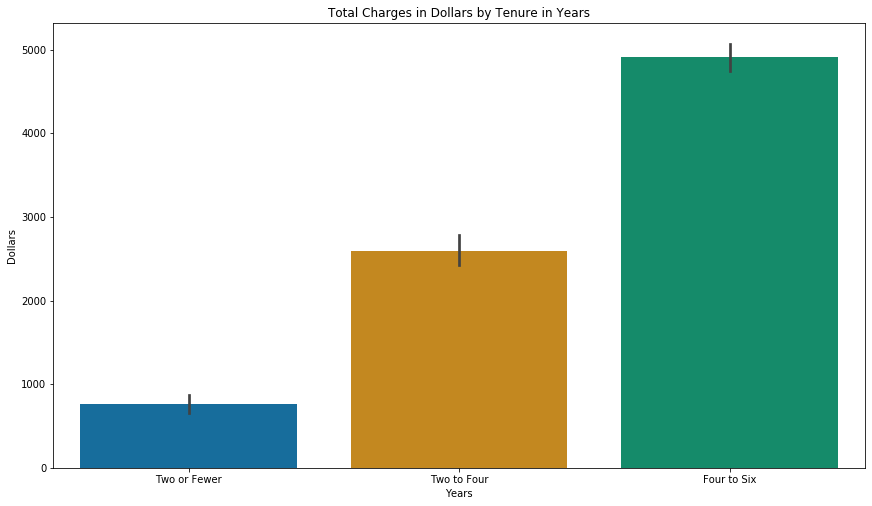

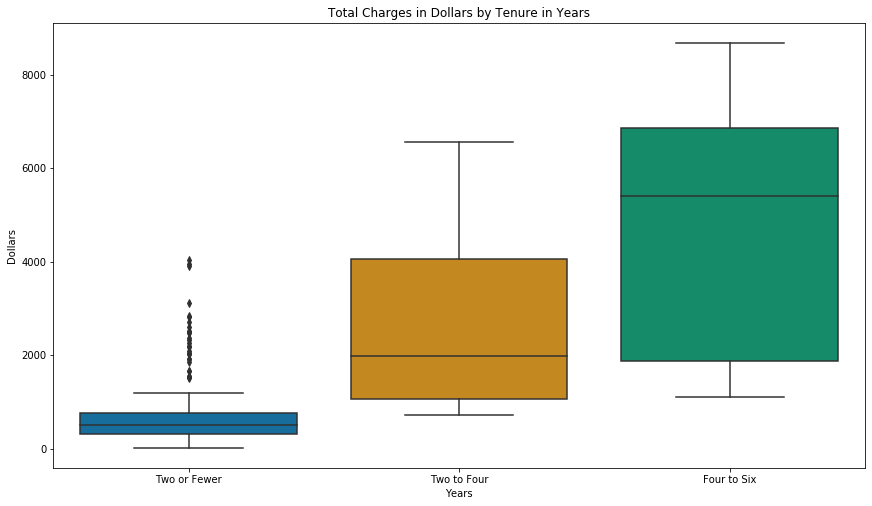

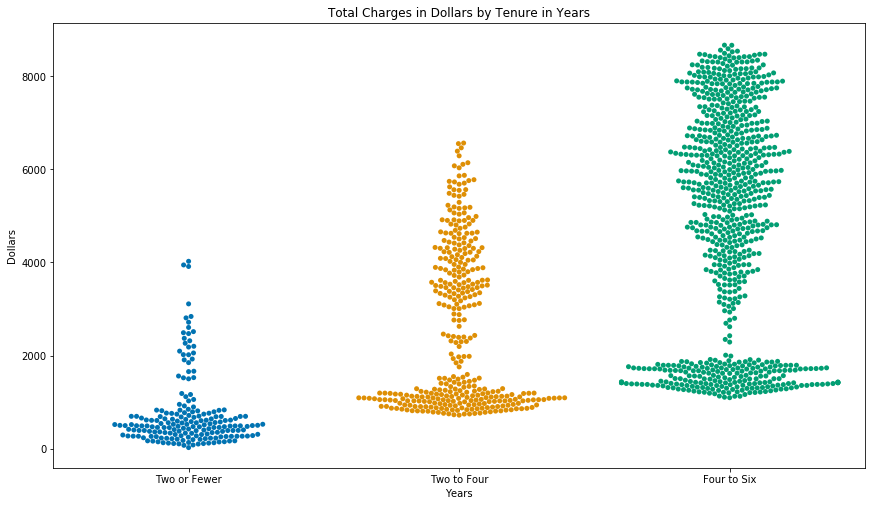

(<matplotlib.axes._subplots.AxesSubplot at 0x131110450>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1305dbf50>)

In [10]:
ex.plot_categorical_and_continuous_vars(train.tenure_bins, train.total_charges, train)

In [17]:
sklearn.preprocessing.QuantileTransformer?

In [18]:
sklearn.preprocessing.PowerTransformer?

In [14]:
sklearn.preprocessing.MinMaxScaler?

In [15]:
sklearn.preprocessing.RobustScaler?